# Final Project - Loans Dataset

Welcome to the final step on the Exploratory Data Analysis (EDA) module. Congratulations! This is the final project!


## Instructions

The objective of this project is to explore and solve problems on a Loans Dataset (`final_project_lending.csv`). This dataset contains information about credit applicants. Banks use this kind of datasets to create models to help on deciding on who to accept/refuse for a loan. Generally, after cleaning and organizing the dataset, the patterns of a good / bad applicant are learned by machine learning models.

Explore, test, evaluate, think, be skeptic! This is Data Science!


## Details on the dataset

The Target (Label) name is `bad_loan`, where $1$ means the observation is a default (person that ended up not paying the loan), and $0$ means the observation is a non-default (person that ended up paying the loan).

All the other features are characteristics of the applicant. 


## Delivery of Project

This jupyter notebook is to be delivered to evaluate your knowledge on the Exploratory Data Analysis module at Rumos, **before the FINAL DATE (20-nov-2023)** agreed with the professor. Please add your name and e-mail next.

**Student Name**: "Maria Cristiana das Neves"  
**E-mail**: "marycrisneves@gmail.com"


## Plagiarism

Always remember that you are here to learn. Discussions on the final project are highly incentivised but please do not share your work. The struggle to solve the problems is needed in order to become a true Data Scientist. By allowing others to use your code you are making the world a worse place: you are not truly helping your colleague, and you are not promoting discussions on the topic.

In case you need help, or just want to discuss some project-related topics, reach out to me either through email or through a Slack direct message.

In [1]:
# NOTE: You can import any library you might find useful besides the following ones
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    OrdinalEncoder
)

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from scipy.stats import pearsonr, spearmanr

In [2]:
# RUN this cell: load the dataset (do NOT delete this cell)
data = pd.read_csv('final_project_lending.csv', low_memory=False)

# Objectives

Please solve the following exercises by creating a markdown cell with **# EXERCISE >>NUMBER<<**  just before you solve it (you can use the number of cells you need after that).

1. Take a **quick look** at your dataset. If you could say something about it in two sentences, what would it be?

2. **Data Visualization**. *A picture is worth a thousand words.* Do not forget all the tips made on the Data Visualization class!

    2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.  
    2.2. Create a **bar plot** from the data that you think is relevant. Explain.  
    2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  
    2.4. Create a **distribution plot** with a feature broken down by target. Don't forget to add some alpha.  
    2.5. (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.  

3. Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`.

4. Correlation.

    4.1. What are the two most correlated numerical features (Spearman) - absolute number?  
    4.2. What is the numerical feature most correlated with the target (Pearson)?  

5. Are there any **outliers**? If there are, solved them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

6. Deal with the **missing values**, along with anomalies. Detect and eliminate them. Remember: not all missing values are represented by a `np.nan`.

7. **Feature Selection**. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical.)

8. **Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

    8.1. Create a pipeline with three steps: (1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; (2) One Scaler you may know; (3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
    8.2. Fit and Transform your dataset.  
    8.3. Comment what you obtained.  

9. Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.


## Evaluation
Points (of a total of 100%):
1. 5%  
2. 25%  
3. 10%  
4. 10%  
5. 10%  
6. 10%  
7. 10%  
8. 10% 
9. 5%

Final 5% for additional effort and conclusions beyond what was asked (give your _extra mile_).

## Important notes
1. Data Science is all about *flow*. Keep your analysis work-flow consistent.  
2. When it is requested you to *describe* something, please be 1. skeptic, 2. objective, and 3. succinct! 
3. If you don't know: search, invent, study, but please don't leave any exercise blank.

### Good luck!
# 3, 2, 1, GO! GO! GO!

# EXERCISE 1

In [3]:
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [4]:
# Size of your dataset
print('Rows: ', data.shape[0])
print('Columns: ', data.shape[1])

Rows:  20000
Columns:  15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [6]:
data.dtypes

id                         int64
grade                     object
annual_inc               float64
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
bad_loan                   int64
dtype: object

In [7]:
data.isnull().mean() * 100

id                        0.000
grade                     0.000
annual_inc                0.000
short_emp                 0.000
emp_length_num            0.000
home_ownership            7.455
dti                       0.770
purpose                   0.000
term                      0.000
last_delinq_none          0.000
last_major_derog_none    97.130
revol_util                0.000
total_rec_late_fee        0.000
od_ratio                  0.000
bad_loan                  0.000
dtype: float64

In [8]:
data['bad_loan'].value_counts()

0    16000
1     4000
Name: bad_loan, dtype: int64

In the Loans Dataset, we can observe that it comprises 20000 observations and 15 features, which are categorized as follows: 4 categorical features, 10 numerical features, and one target variable. Additionally, it's worth noting that there are three variables within the dataset that contain missing values. These variables are "home_ownership," "dti," and "last_major_derog_none."  It can be observed that there is a class imbalance in the dataset, with approximately 16,000 observations of individuals who successfully paid the loan and around 4,000 observations of individuals who defaulted on the loan.

# EXERCISE 2

##### 2.1. Pick two numerical variables. Create a **scatter plot**. Describe what you see.

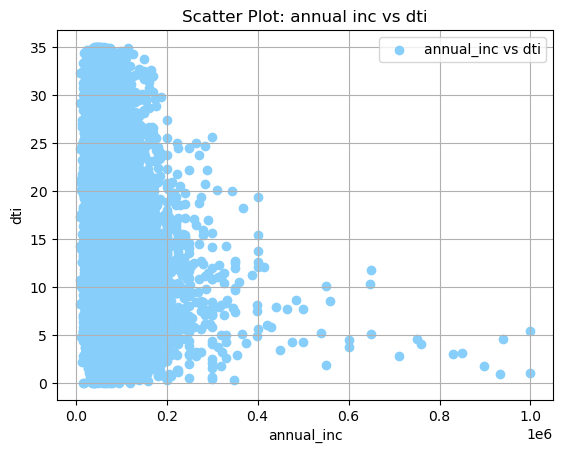

In [9]:
plt.scatter(
    data['annual_inc'],
    data['dti'],
    color = 'lightskyblue',
    label = 'annual_inc vs dti'
)

plt.legend()
plt.xlabel('annual_inc')
plt.ylabel('dti')
plt.title('Scatter Plot: annual inc vs dti')
plt.grid()
plt.show()

The graph shows the correlation between annual income (annual_inc) and the debt-to-income ratio (dti). Most of the points cluster to the left, suggesting a prevalence of individuals with modest annual incomes. Some points on the right indicate cases with significantly higher annual incomes—possibly individuals well above the average. When looking at the overall, it appears that the dti varies for higher annual incomes. In some instances, the ratio decreases as annual income increases.

##### 2.2. Create a **bar plot** from the data that you think is relevant. Explain.

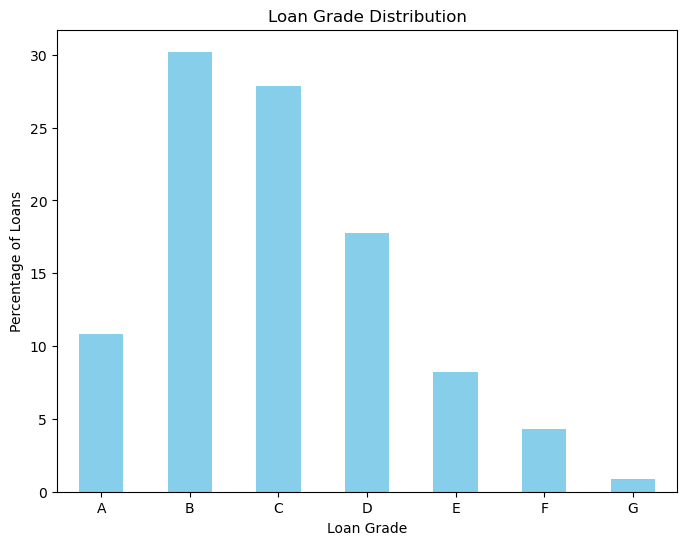

In [10]:
#Loan Grade Distribution
loan_grade_counts = (data['grade'].value_counts()/len(data) * 100).sort_index()
loan_grade_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Loan Grade Distribution')
plt.xlabel('Loan Grade')
plt.ylabel('Percentage of Loans')
plt.xticks(rotation=0)
plt.show()

The analysis reveals that loan grades B, C, and D constitute a significant portion of the dataset, collectively representing the highest percentage. This suggests that a substantial portion of the loans falls within these middle-grade categories, indicating a noteworthy concentration of moderate-risk loans. This information is important for evaluating the diversity of loan grades and making informed decisions about the risk profile.

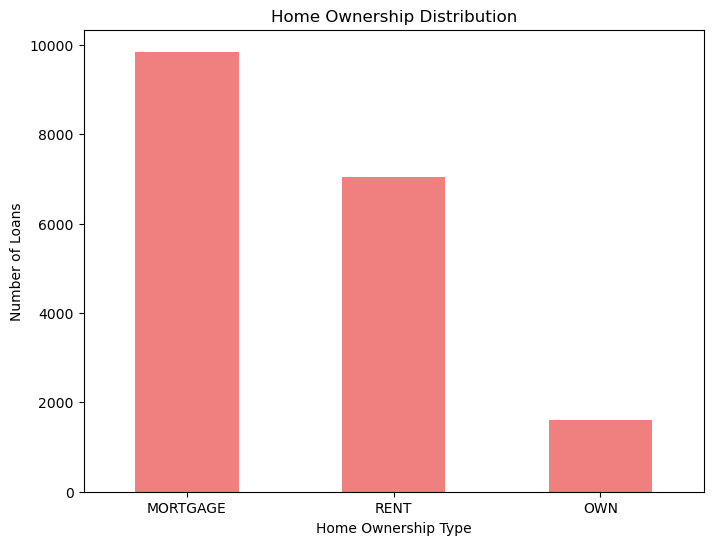

In [11]:
# Home_Ownership Distribution
home_ownership_counts = data['home_ownership'].value_counts()
home_ownership_counts.plot(kind='bar', color='lightcoral', figsize=(8, 6))
plt.title('Home Ownership Distribution')
plt.xlabel('Home Ownership Type')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)
plt.show()

Analyzing the different types of home ownership among borrowers is important for demographic insights and risk assessment, as it may provide indications of financial stability. This analysis reveals that "mortgage" and "rent" categories exhibit a higher number of loans, while the "own" category shows the lowest count among the three. This information underscores the prevalence of borrowers with mortgage or rental arrangements, indicating potential correlations between housing status and borrowing behavior.

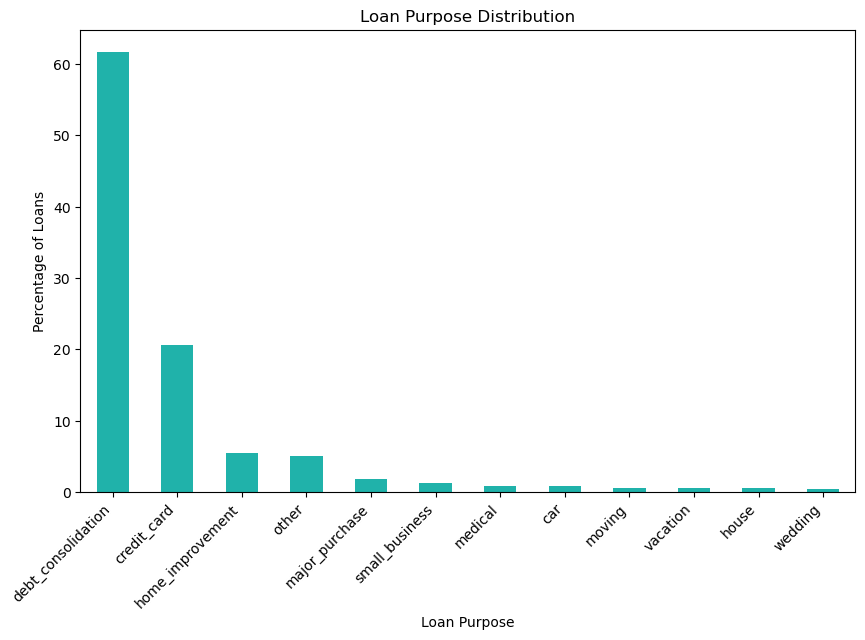

In [12]:
#Loan Purpose Distribution
purpose_counts = data['purpose'].value_counts()/len(data)*100
purpose_counts.plot(kind='bar', color='lightseagreen', figsize=(10, 6))
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

This visualization helps us understand the reasons why borrowers apply for loans giving us insights, into their goals. The analysis shows that the categories of "debt_consolidation", "credit_card" and "home_improvement" have the percentage of loans indicating that many borrowers seek assistance for these purposes. On the hand categories such as "vacation," "house," and "wedding" have the percentage suggesting that loans for these specific reasons are less common, among borrowers.

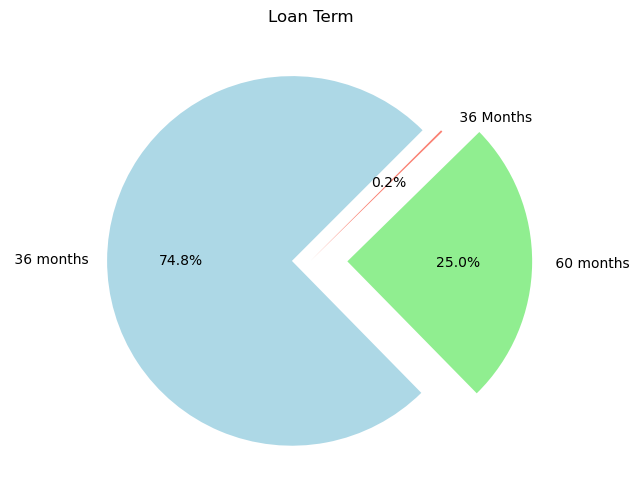

In [13]:
#Loan Term 
term_counts = data['term'].value_counts() / len(data) * 100

explode = (0.1, 0.2, 0)
colors = ['lightblue', 'lightgreen', 'salmon']
plt.figure(figsize=(6, 6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', colors=colors, explode = explode, startangle=45)
plt.title('Loan Term')
plt.show()

The selection of loan terms, like 36 months or 60 months, plays a crucial role in repayment dynamics and assessing risk. Borrowers may opt for shorter terms for quicker repayment, while others might choose longer terms for more flexibility. This analysis revealed that 75% of loans have a term of 36 months, while the remaining 25% have a term of 60 months. 

It's worth noting that a transcription issue, where "months" is written with both uppercase and lowercase 'm', led to the appearance of three segments on the chart when, in reality, there are only two distinct loan terms.

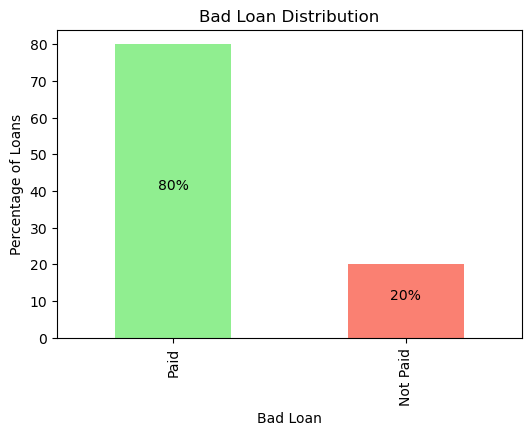

In [14]:
# Bad Loan (target) Distribution
bad_loan_counts = data['bad_loan'].value_counts()/len(data) * 100
color = ('lightgreen', 'salmon')
ax = bad_loan_counts.plot(kind='bar', color= color, figsize=(6, 4))
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=10, color='black', padding=4)

plt.title('Bad Loan Distribution')
plt.xlabel('Bad Loan')
plt.ylabel('Percentage of Loans')
plt.xticks([0, 1], ['Paid', 'Not Paid'])
plt.show()

It's worth noting that, for context, approximately 80% of borrowers successfully repaid their loans, while the remaining 20% did not fulfill their repayment obligations.

##### 2.3. Create a beautiful **heatmap**. Remember what are they useful to show (correlations...)?  

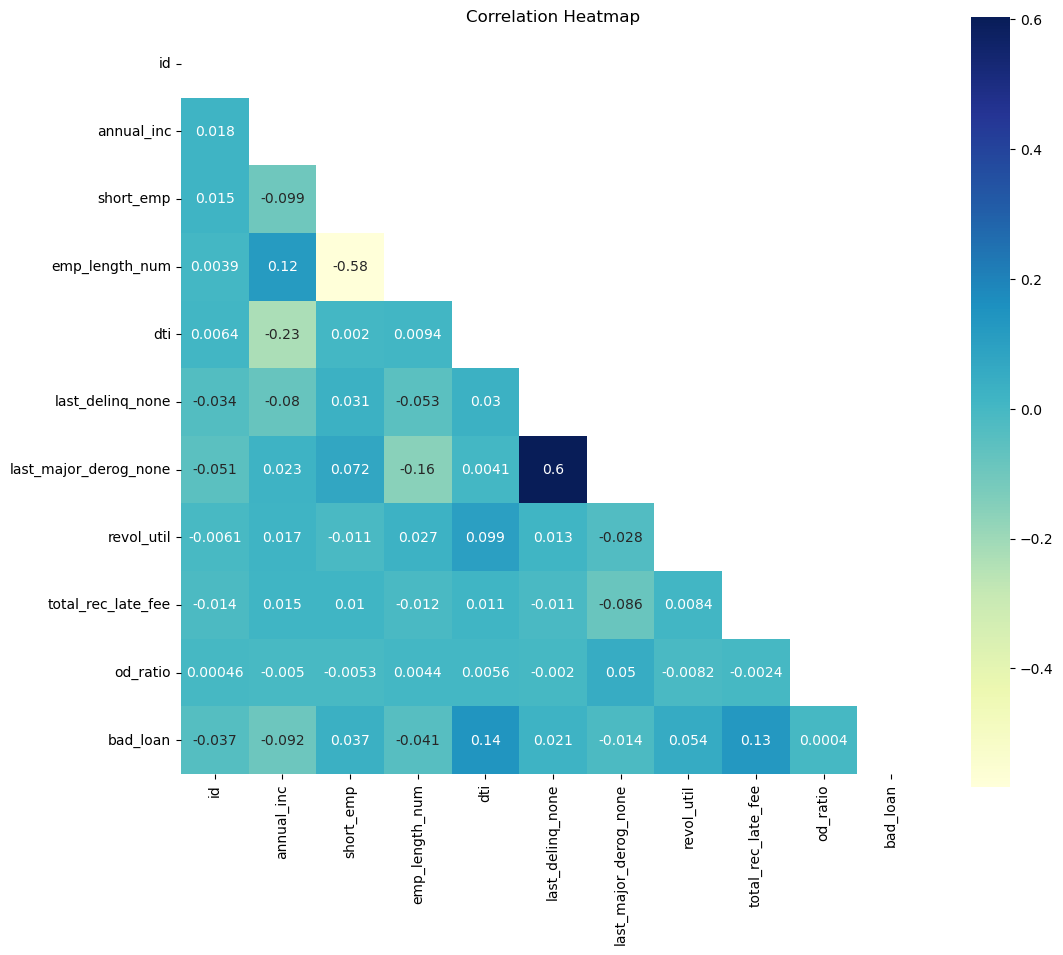

In [15]:
plt.figure(figsize=(12, 10))
corr = data.corr(numeric_only = True)

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, annot=True, square=True, cmap="YlGnBu",
    mask=mask
);

plt.title('Correlation Heatmap')

plt.show()

The variables exhibiting the highest correlation are: last_deling_none with last_major_derog_none (0.6), and emp_length_num with short_emp(-0.58).

Additionally, the variables showing the strongest correlation with the target variable (bad_loan) are: dti and total_rec_late_fee.

##### 2.4. Create a **distribution plot** with a feature broken down by target. Don't forget to add some alpha.  

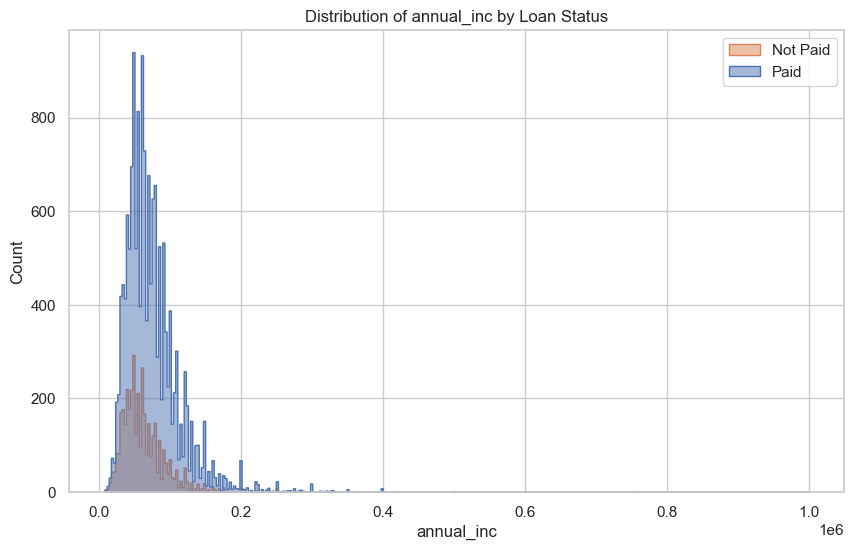

In [16]:
feature_to_plot = "annual_inc"

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(data, x=feature_to_plot, hue="bad_loan", common_norm=False, element="step", alpha=0.5)
plt.title(f'Distribution of {feature_to_plot} by Loan Status')
plt.legend(labels=["Not Paid", "Paid"])
plt.show()

##### 2.5. (Optional, but incentivized) Create an additional **insightful plot**. Describe the insight.

In [17]:
#Grade vs bad_loan
cross_table = pd.crosstab(data['grade'], data['bad_loan'], normalize = 'index') * 100

cross_table = cross_table.rename(columns = {0:'Paid', 1:'Not Paid'})
cross_table

bad_loan,Paid,Not Paid
grade,,
A,94.256600,5.743400
B,87.305528,12.694472
C,78.943586,21.056414
D,72.453573,27.546427
E,67.051672,32.948328
F,59.421965,40.578035
G,61.538462,38.461538


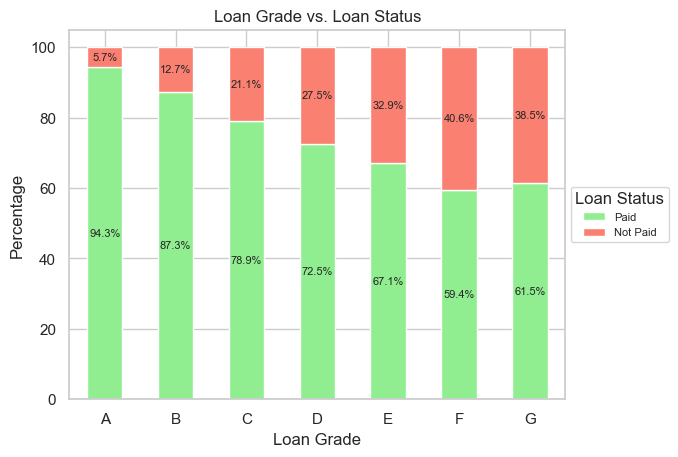

In [18]:
sns.set(style="whitegrid")
ax = cross_table.plot(kind='bar', stacked=True, color=["lightgreen", "salmon"])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize =8)

plt.title('Loan Grade vs. Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title="Loan Status", labels=["Paid", "Not Paid"], loc="center left", bbox_to_anchor=(1, 0.5), fontsize = 8)
plt.show();

- The percentage of 'Not Paid' tends to increase as the loan grade decreases (from A to G). Lower-grade loans are associated with a higher probability of not paid.
- Loans, with grades A and B have a higher proportion of loans marked as "Paid" (94.3% and 87.3%, respectively) suggesting that these higher grade loans are less likely to default.
- Loans, with grades F and G have a higher proportion of loans marked as "Not Paid" (40.6% and 38.5%, respectively) suggesting that these lower grade loans are more likely to default.

# EXERCISE 3

Fully characterize, in term of **descriptive statistics**, the variables `id`, `annual_inc` and `grade`.

In [19]:
#Variable 'id'
id_count = data['id'].nunique()
print(f"Count: {id_count}")
id_min = data['id'].min()
id_max = data['id'].max()
print(f"Minimum ID: {id_min}")
print(f"Maximum ID: {id_max}")
id_missing = data['id'].isnull().sum()
print(f"Missing values : {id_missing}")
duplicate_id = data['id'].duplicated().any()
print("Duplicate values:", duplicate_id)

Count: 20000
Minimum ID: 586040
Maximum ID: 11454641
Missing values : 0
Duplicate values: False


- The "ID" variable serves as a unique identifier and it contains 20000 distinct IDs.
- The range of ID: minimum of 586040 to a maximum of 11454641. ID variable is not consecutive, and there are gaps in the sequence.
- There are no missing or duplicate values.

In [20]:
# Variable 'annual_inc'
annual_inc_statistics = data['annual_inc'].describe()

print("Descriptive Statistics for annual_inc:")
print(annual_inc_statistics)

Descriptive Statistics for annual_inc:
count      20000.000000
mean       73349.578350
std        45198.567255
min         8412.000000
25%        47000.000000
50%        65000.000000
75%        88000.000000
max      1000000.000000
Name: annual_inc, dtype: float64


- The dataset contains information on the annual income of 20000 individuals.
- The average (mean) annual income is approximately 73349.58.
- The standard deviation of approximately 45198.57 suggests a moderate level of variability.
- The range of reported annual incomes is from a minimum of 8412.00 to a maximum of 1000000.00.

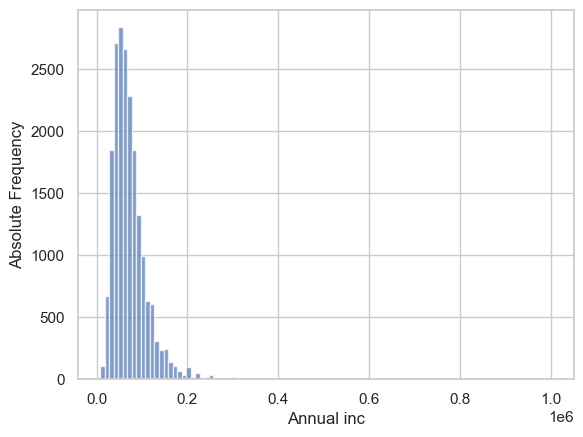

In [21]:
# skewness measurement for annual_inc variable
plt.hist(data['annual_inc'], bins=100, alpha = 0.7)

plt.xlabel('Annual inc')
plt.ylabel('Absolute Frequency')
plt.show()

In [22]:
skew_value = scipy.stats.skew(data['annual_inc'])
skew_value = round(skew_value, 2)
skew_value

5.28

The value of 5.28 for the skewness measure is positive, indicating that the data distribution is positively skewed to the right. It can be concluded that the data distribution tends to have lower values with a long tail towards higher values, indicating a positive skew towards the upper end of the scale.

In [23]:
# Kurtosis measurement for annual_inc variable
kurtosis_value = scipy.stats.kurtosis(data['annual_inc'])
kurtosis_value = round(kurtosis_value, 2)
kurtosis_value

66.73

A kurtosis value of 66.73 indicates that the dataset has a distribution with extremely heavy tails (leptokurtic) compared to a normal distribution.
A kurtosis value of 66.73 suggests that the dataset deviates significantly from a normal distribution, with very heavy tails and an extreme degree of peakedness. It may indicate the presence of outliers or unusual data patterns in the dataset.

In [24]:
# Variable 'grade'
data['grade'].describe()

count     20000
unique        7
top           B
freq       6042
Name: grade, dtype: object

- The 'grade' variable has 7 unique values (categories).
- The mode of the 'grade' variable is 'B', indicating that a significant portion of the loans falls into this grade.

In [25]:
grade_counts = data['grade'].value_counts().sort_index()

print("\nCounts of each loan grade:")
print(grade_counts)


Counts of each loan grade:
A    2159
B    6042
C    5566
D    3554
E    1645
F     865
G     169
Name: grade, dtype: int64


In [26]:
# loan_grade percentage
grade_percentage = data['grade'].value_counts(normalize=True) * 100
sorted_grade_percentage = grade_percentage.sort_index()
sorted_grade_percentage

A    10.795
B    30.210
C    27.830
D    17.770
E     8.225
F     4.325
G     0.845
Name: grade, dtype: float64

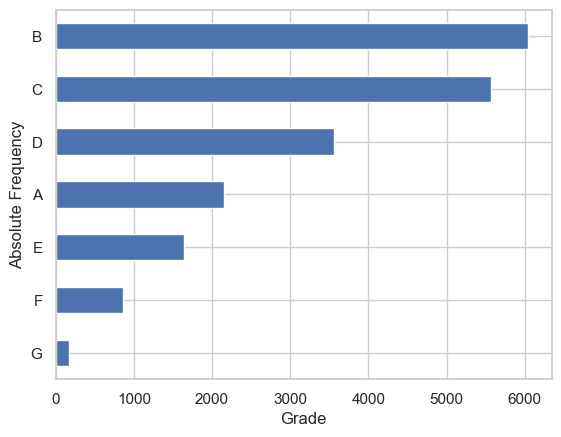

In [27]:
data['grade'].value_counts(ascending=True).plot.barh()

plt.xlabel('Grade')
plt.ylabel('Absolute Frequency')
plt.show()

The majority of loans in the dataset are graded as 'B', suggesting that a significant portion of borrowers falls into this category. Grades 'C' and 'D' also have notable representation. 

# EXERCISE 4

##### 4.1. What are the two most correlated numerical features (Spearman) - absolute number

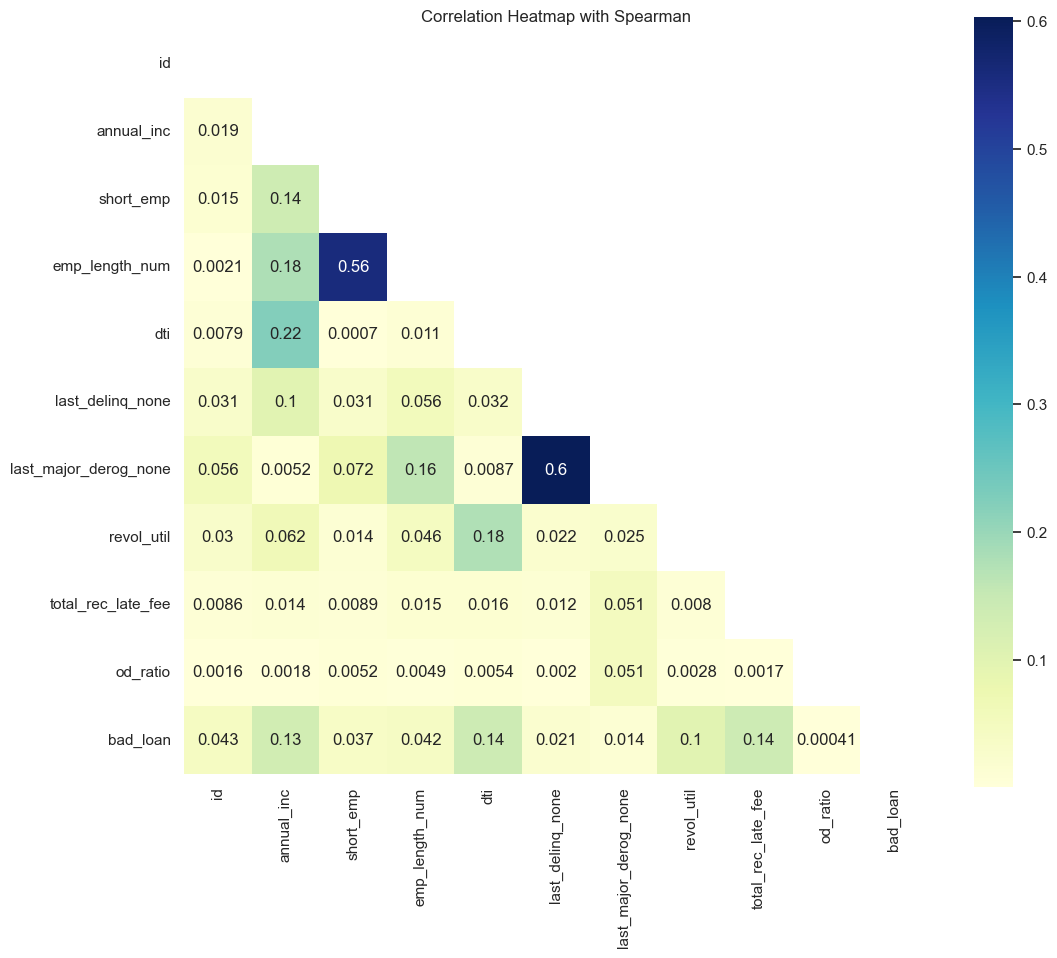

In [28]:
plt.figure(figsize=(12, 10))
corr = data.corr(numeric_only = True, method = "spearman")

abs_corr = np.abs(corr)

mask = np.triu(np.ones_like(abs_corr))

sns.heatmap(
    abs_corr, annot=True, square=True, cmap="YlGnBu",
    mask=mask
);

plt.title('Correlation Heatmap with Spearman')

plt.show()

The two most correlated numerical features, last_major_derog_none and last_delinq_none, have a correlation coefficient of 0.6.

##### 4.2. What is the numerical feature most correlated with the target (Pearson)?

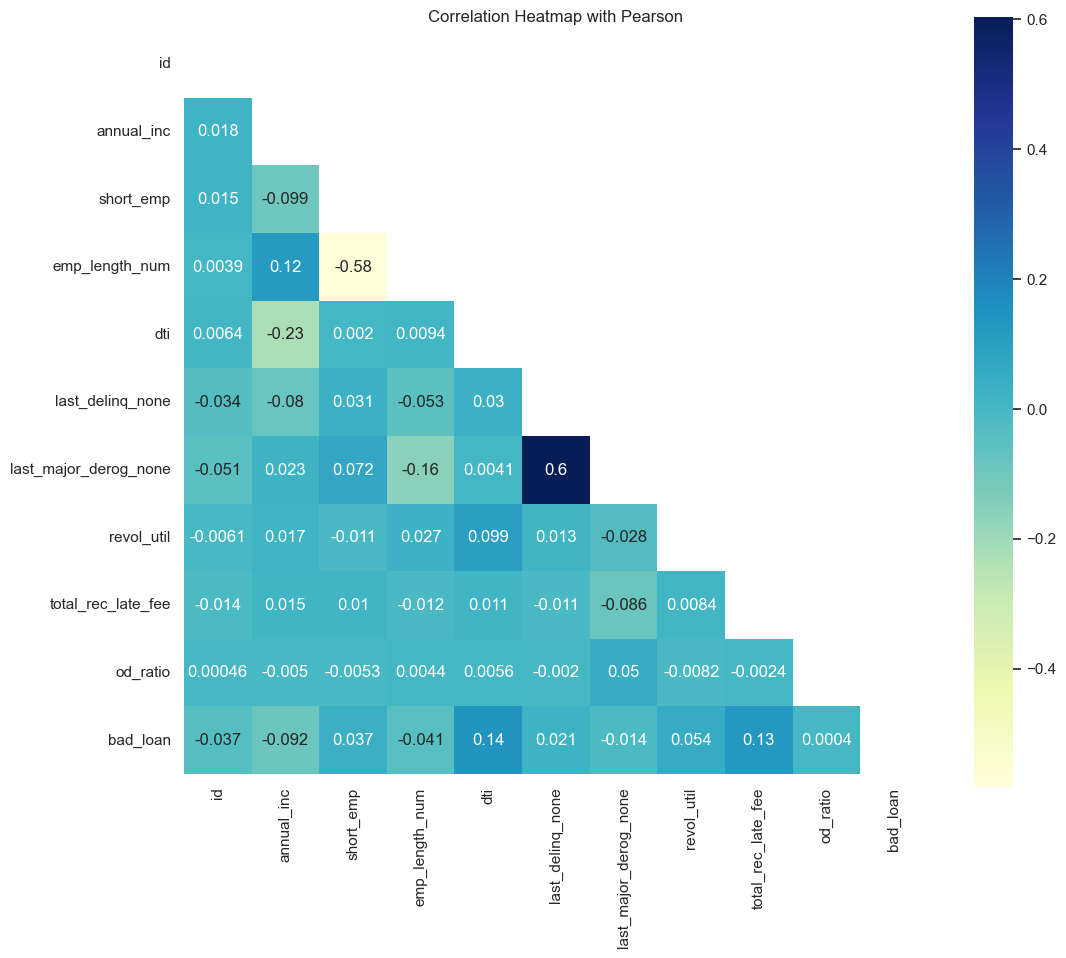

In [29]:
plt.figure(figsize=(12, 10))
corr = data.corr(numeric_only = True, method = "pearson")

mask = np.triu(np.ones_like(corr))

sns.heatmap(
    corr, annot=True, square=True, cmap="YlGnBu",
    mask=mask
);

plt.title('Correlation Heatmap with Pearson')

plt.show()

The numerical feature most correlated with the target is dti (0.14).

# EXERCISE 5

##### Are there any **outliers**? If there are, solved them. **Justify** all detected outliers, and **justify** the method you chose to eliminate. 

In [30]:
data.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [31]:
unique_values = data[['last_major_derog_none', 'short_emp', 'bad_loan', 'last_delinq_none']].nunique()
unique_values

last_major_derog_none    2
short_emp                2
bad_loan                 2
last_delinq_none         2
dtype: int64

The variables that exhibit a lower standard deviation are: short_emp, last_delinq_none, last_major_derog_none, and bad_loan. Upon closer inspection, it was observed that these variables have only two unique values. Therefore, these variables do not show any variability within their values, and as a result, they do not have any outliers.

Let's now consider all the other variables to check if we have any outliers.

In [32]:
selected_variables = ['annual_inc', 'dti', 'emp_length_num', 'revol_util', 'total_rec_late_fee', 'od_ratio']

mean_variation = {}
std_variation = {}
outlier_limit_2std = {}
outlier_limit_3std = {}
num_outliers_2std = {}
num_outliers_3std = {}

for column in selected_variables:
    mean_variation[column] = data[column].mean()
    std_variation[column] = data[column].std()
    
    outlier_limit_2std[column] = mean_variation[column] + 2 * std_variation[column]
    outlier_limit_3std[column] = mean_variation[column] + 3 * std_variation[column]
    
    outliers_2std = data[data[column] > outlier_limit_2std[column]]
    outliers_3std = data[data[column] > outlier_limit_3std[column]]

    num_outliers_2std[column] = len(outliers_2std)
    num_outliers_3std[column] = len(outliers_3std)
    
for column in selected_variables:
    print(f"\nColumn: {column}")
    print("Mean:", mean_variation[column])
    print("Standard Deviation:", std_variation[column])
    print("Outlier Limit (2 standard deviations):", outlier_limit_2std[column])
    print("Outlier Limit (3 standard deviations):", outlier_limit_3std[column])
    print("Number of Outliers (2 standard deviations):", num_outliers_2std[column])
    print("Number of Outliers (3 standard deviations):", num_outliers_3std[column])


Column: annual_inc
Mean: 73349.57835
Standard Deviation: 45198.56725472537
Outlier Limit (2 standard deviations): 163746.71285945072
Outlier Limit (3 standard deviations): 208945.2801141761
Number of Outliers (2 standard deviations): 615
Number of Outliers (3 standard deviations): 259

Column: dti
Mean: 16.58784137861534
Standard Deviation: 7.585811951545168
Outlier Limit (2 standard deviations): 31.759465281705676
Outlier Limit (3 standard deviations): 39.34527723325084
Number of Outliers (2 standard deviations): 495
Number of Outliers (3 standard deviations): 0

Column: emp_length_num
Mean: 6.8214
Standard Deviation: 3.7742302898357223
Outlier Limit (2 standard deviations): 14.369860579671444
Outlier Limit (3 standard deviations): 18.144090869507167
Number of Outliers (2 standard deviations): 0
Number of Outliers (3 standard deviations): 0

Column: revol_util
Mean: 55.958148054999995
Standard Deviation: 42.117455872216155
Outlier Limit (2 standard deviations): 140.19305979943232
Out

For the variable annual_inc, considering the 3-standard deviation range, we have 259 outliers. For the variable dti, considering the 3-standard deviation range, there are no outliers present. The same applies to the variables emp_length_num and od_ratio, where no outliers were identified (0 outliers). For the variable revol_util, we have 1 outlier, and for the variable total_rec_late_fee, we have 227 outliers, even considering a 3-standard deviation range.

Let's create graphical representations of the values obtained earlier to confirm if they are indeed all outliers.

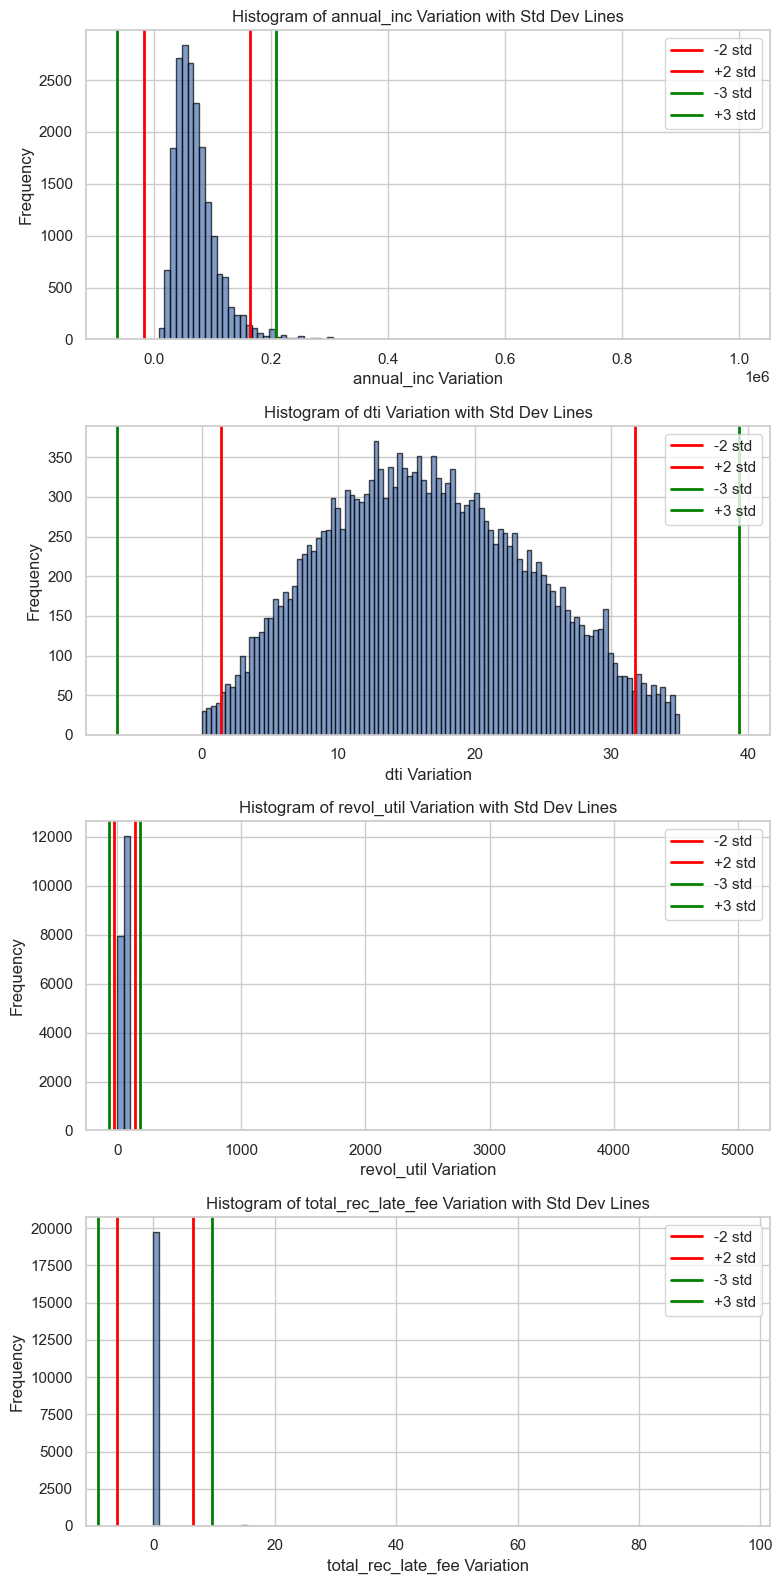

In [33]:
selected_columns = ['annual_inc', 'dti', 'revol_util', 'total_rec_late_fee']

num_bins = 100

fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(8, 4 * len(selected_columns)))

for i, column in enumerate(selected_columns):
    mean_variation = data[column].mean()
    std_variation = data[column].std()

    axes[i].hist(data[column], bins=num_bins, edgecolor='black', alpha=0.7)

    axes[i].axvline(mean_variation - 2 * std_variation, color='red', linewidth=2, label='-2 std')
    axes[i].axvline(mean_variation + 2 * std_variation, color='red', linewidth=2, label='+2 std')
    axes[i].axvline(mean_variation - 3 * std_variation, color='green', linewidth=2, label='-3 std')
    axes[i].axvline(mean_variation + 3 * std_variation, color='green', linewidth=2, label='+3 std')

    axes[i].set_xlabel(f'{column} Variation')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column} Variation with Std Dev Lines')
    axes[i].legend()

plt.tight_layout()
plt.show()


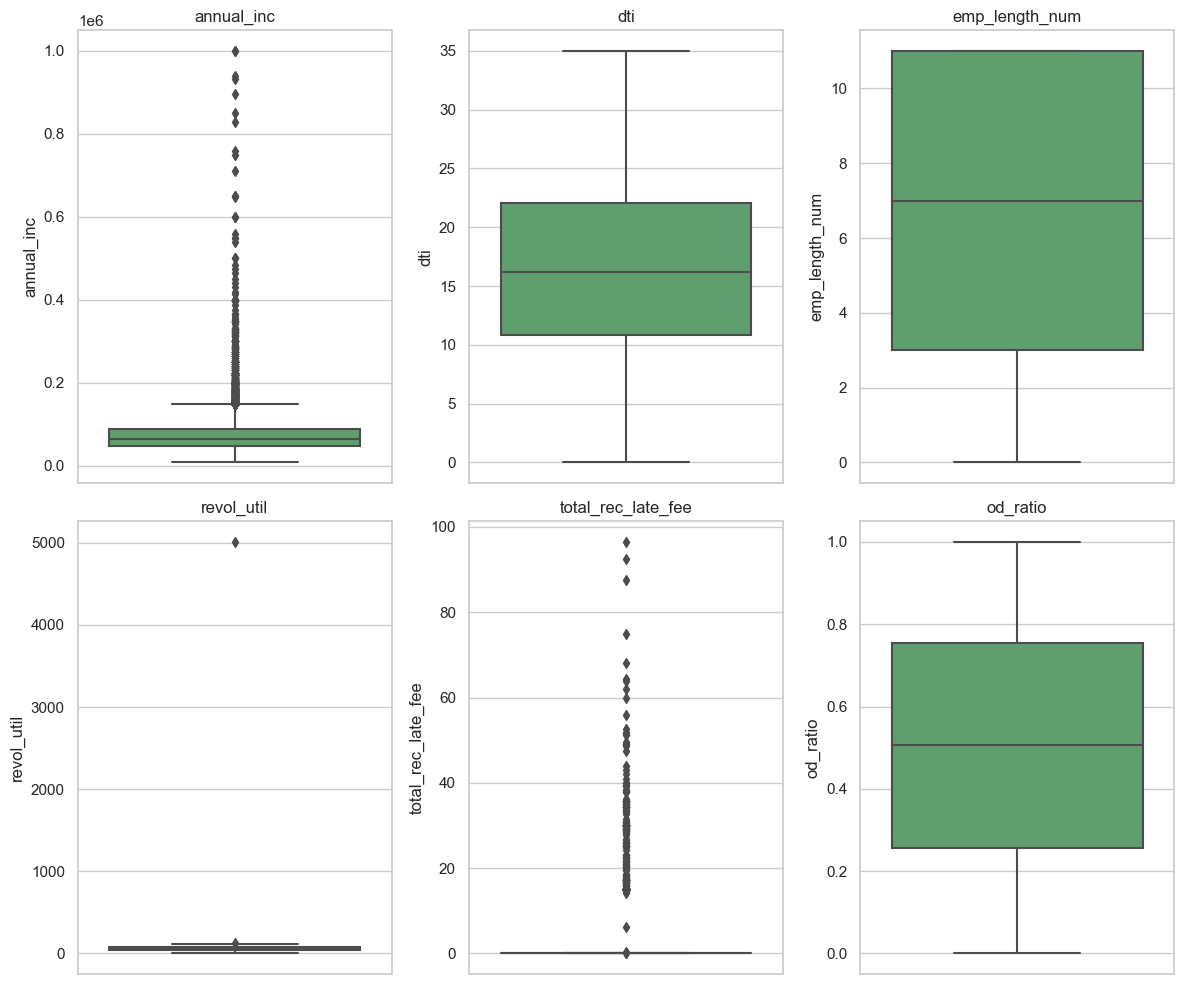

In [34]:
#Boxplots
selected_variables = ['annual_inc', 'dti', 'emp_length_num', 'revol_util', 'total_rec_late_fee', 'od_ratio']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

axes = axes.flatten()

for i, variable in enumerate(selected_variables):
    sns.boxplot(y=data[variable], ax=axes[i], color = 'g')
    axes[i].set_title(variable)

plt.tight_layout()
plt.show()

Observing the boxplots, the only variable that seems to have an outlier is revol_util because it has a point that is significantly distant from the others. 

All other variables have continuous values. For example, in the case of annual_inc, there is a higher percentage of points on the right side of the plot, making the points farther away appear as outliers when, in reality, they are not.

The same was observed for the 'total_rec_late_fee' variable, where the values also appear to be continuous and do not have distinctly discrepant values. 

Therefore, the only outliers to be removed are those from the 'revol_util' variable, and for that, we will use the IQR method.

**IQR method** is a statistical tecnique used to identify and handle outliers. It involves calculating the range between the first quartile (Q1) and the third quartile (Q3) of a variable's distribution. Outliers are identified as data points that fall below Q1 - 1.5 X IQR or above Q3 + 1.5 x IQR. This method is robust and less sensitive to extreme values than other methods.

In [35]:
# Calculate the IQR for 'revol_util'
Q1 = data['revol_util'].quantile(0.25)
Q3 = data['revol_util'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers for 'revol_util'
outliers = data[(data['revol_util'] < lower_bound) | (data['revol_util'] > upper_bound)]

# Display the potential outliers
print("Potential Outliers")
print(outliers)

Potential Outliers
            id grade  annual_inc  short_emp  emp_length_num home_ownership  \
100   10099081     C     75000.0          0               7       MORTGAGE   
2643   7095152     B     40000.0          0               9       MORTGAGE   

        dti             purpose        term  last_delinq_none  \
100    9.04  debt_consolidation   36 Months                 1   
2643  30.54         credit_card   36 months                 1   

      last_major_derog_none  revol_util  total_rec_late_fee  od_ratio  \
100                     NaN      5010.0                 0.0  0.159584   
2643                    NaN       128.1                15.0  0.398533   

      bad_loan  
100          0  
2643         1  


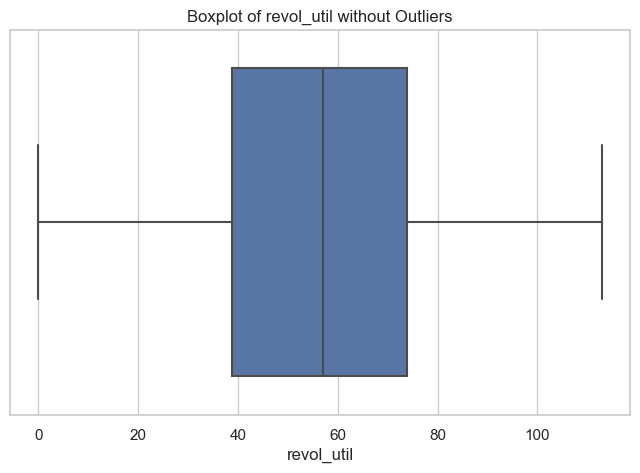

In [36]:
# Remove rows with extreme values for 'revol_util' variable
data = data[data['revol_util'] < upper_bound]

# Check if the extreme values were removed
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['revol_util'])
plt.title('Boxplot of revol_util without Outliers')
plt.show()

# Exercise 6

Deal with the **missing values**, along with anomalies. Detect and eliminate them. Remember: not all missing values are represented by a `np.nan`.

In [37]:
data.isnull().mean()* 100

id                        0.000000
grade                     0.000000
annual_inc                0.000000
short_emp                 0.000000
emp_length_num            0.000000
home_ownership            7.455746
dti                       0.770077
purpose                   0.000000
term                      0.000000
last_delinq_none          0.000000
last_major_derog_none    97.129713
revol_util                0.000000
total_rec_late_fee        0.000000
od_ratio                  0.000000
bad_loan                  0.000000
dtype: float64

Since the 'last_major_derog_none' variable has approximately 97% missing values, it will be removed as it does not provide relevant information for our dataset. 

In [38]:
data2 = data.drop(axis = 1, columns = ['last_major_derog_none'])

In [39]:
data2.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0


In [40]:
data2.describe(include = 'object')

,grade,home_ownership,purpose,term
count,19998,18507,19998,19998
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6041,9842,12336,14968


In [41]:
# Replace missing values in the 'home_ownership' variable with the mode, as this variable is categorical.

# Create a SimpleImputer with strategy 'most_frequent'
mode_simple_imputer = SimpleImputer(strategy="most_frequent")

# Fit and transform the imputer on the 'home_ownership' column
data2['home_ownership'] = mode_simple_imputer.fit_transform(data2[['home_ownership']])

In [42]:
data2.isnull().mean() * 100

id                    0.000000
grade                 0.000000
annual_inc            0.000000
short_emp             0.000000
emp_length_num        0.000000
home_ownership        0.000000
dti                   0.770077
purpose               0.000000
term                  0.000000
last_delinq_none      0.000000
revol_util            0.000000
total_rec_late_fee    0.000000
od_ratio              0.000000
bad_loan              0.000000
dtype: float64

In [43]:
data2.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,1.999800e+04,19998.000000,19998.000000,19998.000000,19844.000000,19998.000000,19998.000000,19998.000000,19998.000000,19998.000000
mean,7.590561e+06,73351.163466,0.112511,6.821282,16.587519,0.546555,55.706814,0.289901,0.504453,0.199970
std,1.609572e+06,45200.210694,0.316002,3.774387,7.585358,0.497840,23.375702,3.107068,0.287723,0.399987
min,5.860400e+05,8412.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.000000
25%,6.206278e+06,47000.000000,0.000000,3.000000,10.857500,0.000000,38.800000,0.000000,0.257385,0.000000
50%,7.378896e+06,65000.000000,0.000000,7.000000,16.190000,1.000000,57.100000,0.000000,0.506742,0.000000
75%,8.766196e+06,88000.000000,0.000000,11.000000,22.060000,1.000000,73.900000,0.000000,0.753773,0.000000
max,1.145464e+07,1000000.000000,1.000000,11.000000,34.990000,1.000000,112.900000,96.466600,0.999894,1.000000


In [44]:
# Replace missing values in 'dti' with the median since it is less sensitive to outliers. 
# Nevertheless, the mean and median values are very similar, as observed through data.describe().

# Create a SimpleImputer with strategy 'median'
median_simple_imputer = SimpleImputer(strategy="median")

# Fit and transform the imputer on the 'median' column
data2['dti'] = median_simple_imputer.fit_transform(data2[['dti']])

In [45]:
data2.isnull().mean() * 100

id                    0.0
grade                 0.0
annual_inc            0.0
short_emp             0.0
emp_length_num        0.0
home_ownership        0.0
dti                   0.0
purpose               0.0
term                  0.0
last_delinq_none      0.0
revol_util            0.0
total_rec_late_fee    0.0
od_ratio              0.0
bad_loan              0.0
dtype: float64

# Exercise 7

**Feature Selection**. Select at least two numerical features to drop. Justify the method(s) you used, and why you chose those variables. (Note: you can drop more variables, either categorical or numerical.)

One of the columns we can eliminate is 'id' since it doesn't provide relevant information, as it only contains unique identifiers.

In [46]:
# Remove the 'id' variable from the dataset 
data3 = data2.drop(axis = 1, columns = ['id'])

In [47]:
data3.head()

,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,43.2,0.0,0.160624,0
1,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,21.5,0.0,0.810777,0
2,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,46.3,0.0,0.035147,1
3,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,10.7,0.0,0.534887,1
4,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,15.2,0.0,0.166500,0


In [48]:
# Select the predictive features using Pearson Correlation p-value
selected_columns = ['annual_inc', 'short_emp', 'emp_length_num', 'dti', 'last_delinq_none', 'revol_util', 'total_rec_late_fee', 'od_ratio']

for col in selected_columns:
    corr, pval = scipy.stats.pearsonr(data3[col], data3['bad_loan'])
    print(f"Correlation between {col} and bad_loan: {corr}, p-value: {pval}")

Correlation between annual_inc and bad_loan: -0.09233818319699255, p-value: 4.007185609431258e-39
Correlation between short_emp and bad_loan: 0.03721672101920172, p-value: 1.40593824091841e-07
Correlation between emp_length_num and bad_loan: -0.041481376115416385, p-value: 4.405035272818514e-09
Correlation between dti and bad_loan: 0.1411918563100107, p-value: 1.466428133927862e-89
Correlation between last_delinq_none and bad_loan: 0.021428404227441685, p-value: 0.0024419691634677753
Correlation between revol_util and bad_loan: 0.10172746697997219, p-value: 3.749546513138061e-47
Correlation between total_rec_late_fee and bad_loan: 0.12984374807318316, p-value: 6.424957062721593e-76
Correlation between od_ratio and bad_loan: 0.0004103910679085143, p-value: 0.9537235101630132


- Weak negative correlation with bad_loan: annual_inc, emp_length_num --> p-value is very small (< 0.05) --> indicates statistical significance
- Weak positive correlation with bad_loan: short_emp, last_delinq_none, revol_util --> p-value is vaery small --> indicates statistical significance
- Moderate positive correlation with bad_loan: dti and total_rec_late_fee --> p-value is very small --> indicates statistical significance
- Extremely weak positive correlation with bad_loan: od_ration --> p-value is very high --> suggesting it might not be statistically significant --> remove variable

In [49]:
# Remove the 'od_ration' variable from the dataset
data4 = data3.drop(axis = 1, columns = ['od_ratio'])

In [50]:
# Categorical variables
data4.describe(include='object')

,grade,home_ownership,purpose,term
count,19998,19998,19998,19998
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6041,11333,12336,14968


In [51]:
# As observed previously, the 'term' variable has 3 categories, but 2 of them are the same, with the only difference being the capitalization of the letter M. 
# Let's proceed with the transformation.
data4['term'] = data4['term'].str.lower()

In [52]:
data4['term'].unique()
#Now we only have 36 months and 60 months in the 'term' variable.

array([' 36 months', ' 60 months'], dtype=object)

In [53]:
# Let's get the contigency table of categorical features vs target
selected_columns = ['grade', 'home_ownership', 'purpose', 'term']

for col in selected_columns:
    table = pd.crosstab(data4[col], data['bad_loan'])
    print('\n', table)
    chi, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print('Chi:', round(chi,2),'| Feature:', col, '| p-value:', pval)


 bad_loan     0     1
grade               
A         2035   124
B         5275   766
C         4393  1172
D         2575   979
E         1103   542
F          514   351
G          104    65
Chi: 1044.4 | Feature: grade | p-value: 2.2310304450380276e-222

 bad_loan           0     1
home_ownership            
MORTGAGE        9334  1999
OWN             1297   316
RENT            5368  1684
Chi: 106.02 | Feature: home_ownership | p-value: 9.525349486943704e-24

 bad_loan               0     1
purpose                       
car                  138    30
credit_card         3435   701
debt_consolidation  9854  2482
home_improvement     887   209
house                 86    15
major_purchase       293    86
medical              136    39
moving                93    30
other                747   274
small_business       177    88
vacation              86    26
wedding               67    19
Chi: 90.38 | Feature: purpose | p-value: 1.4047511440677462e-14

 bad_loan        0     1
term       

All the categorical variables seem to have a significant relationship with the target variable 'bad_loan' since the p-value is small for all of them.

# Exercise 8

**Pipelines** (scikit-learn). Load the dataset again and **select only the numerical variables**.

    8.1. Create a pipeline with three steps: (1) [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) with `strategy=’median’`; (2) One Scaler you may know; (3) [Principal Component Analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (with final 5 features)  
    8.2. Fit and Transform your dataset.  
    8.3. Comment what you obtained. 

In [54]:
#Load the dataset again
data = pd.read_csv('final_project_lending.csv', low_memory=False)

In [55]:
# Select only numerical variables
numeric_data = data.select_dtypes(include='number')

In [56]:
numeric_data.head()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,100000.0,1,1,26.27,1,NaN,43.2,0.0,0.160624,0
1,9604874,83000.0,0,4,5.39,0,NaN,21.5,0.0,0.810777,0
2,9684700,78000.0,0,11,18.45,1,NaN,46.3,0.0,0.035147,1
3,9695736,37536.0,0,6,12.28,0,NaN,10.7,0.0,0.534887,1
4,9795013,65000.0,0,11,11.26,0,NaN,15.2,0.0,0.166500,0


In [57]:
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), # Step 1
                        ('scaler', MinMaxScaler()), # Step 2
                        ('pca', PCA(n_components=5)), # Step 3
                       ])

In [58]:
my_pipeline.fit(numeric_data)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()), ('pca', PCA(n_components=5))])

In [59]:
numeric_data_transformed = my_pipeline.transform(numeric_data)
numeric_data_transformed = pd.DataFrame(numeric_data_transformed, 
                                        columns=['F1', 'F2', 'F3', 'F4', 'F5'])
numeric_data_transformed.head()

,F1,F2,F3,F4,F5
0,0.566893,0.725589,-0.591843,0.333759,-0.446340
1,-0.542425,0.086266,-0.266149,-0.305041,0.381466
2,0.446580,-0.032801,0.873600,0.473424,-0.074660
3,-0.496213,0.411480,0.703547,-0.026904,0.235978
4,-0.607484,-0.328823,-0.040156,0.342172,0.000615


In [60]:
numeric_data_transformed.isnull().sum()

F1    0
F2    0
F3    0
F4    0
F5    0
dtype: int64

In [61]:
print('Explained variation per principal component: {}'.format(my_pipeline.named_steps['pca'].explained_variance_ratio_))

Explained variation per principal component: [0.31731672 0.22183652 0.20052845 0.10524437 0.05825442]


- The first component explains approximately 31.73% of the variance.
- The second component explains approximately 22.18% of the variance.
- The third component explains approximately 20.05% of the variance.
- The fourth component explains approximately 10.52% of the variance.
- The fifth component explains approximately 5.82% of the variance.

Using all five components we have approximately 90.32% of the total variance.

# Exercise 9

Create a new Pipeline with, **at least, one Transformer created by you**. This Transformer should help on solving one of the issues the dataset has such as for example, outliers, dropping columns based on any particular characteristic, encoding, etc. Then, fit and transform the dataset. NOTE: you can choose to work only with **numerical** or **categorical** variables to ease your work.

In [62]:
#Load the dataset again
data = pd.read_csv('final_project_lending.csv', low_memory=False)

In [63]:
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [64]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X = data.drop('bad_loan',axis=1)
y = data['bad_loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
numeric_features = X_train[['id', 'annual_inc', 'short_emp', 'emp_length_num', 'dti', 'last_delinq_none', 'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio']]

In [66]:
categorical_features = X_train[['grade', 'purpose', 'term', 'home_ownership']]

In [67]:
columns_to_drop = ['id', 'last_major_derog_none']

In [68]:
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                                ('scaler', MinMaxScaler())
                               ])

categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent')), 
                                ('encoder', OrdinalEncoder())
                               ])

In [69]:
preprocessor = ColumnTransformer(
    transformers = [
    ('numeric', numeric_transformer, numeric_features.columns),
    ('categorical', categorical_transformer, categorical_features.columns),
    ('drop_column', 'drop', columns_to_drop)
    ])

In [70]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components = 5))
])

In [71]:
pipeline = pipeline.fit(X_train, y_train)

In [72]:
data_transformed = pipeline.transform(X_train)
data_transformed = pd.DataFrame(data_transformed, 
                                        columns=['F1', 'F2', 'F3', 'F4', 'F5'])
data_transformed.head()

,F1,F2,F3,F4,F5
0,-0.456190,-0.004378,-0.702910,-0.480864,0.355677
1,-0.456045,-0.020288,-0.728981,-0.438887,0.093036
2,-0.130372,1.078092,0.072222,0.583671,-0.225023
3,-1.057402,1.452264,1.133588,-0.410745,0.017286
4,-0.448418,0.015844,-0.756381,0.539055,0.220602


In [73]:
print('Explained variation per principal component: {}'.format(pipeline.named_steps['pca'].explained_variance_ratio_))

Explained variation per principal component: [0.54941039 0.22667624 0.12035522 0.0342474  0.02310327]


- The first component explains approximately 54.94% of the variance.
- The second component explains approximately 22.67% of the variance.
- The third component explains approximately 12.04% of the variance.
- The fourth component explains approximately 3.43% of the variance.
- The fifth component explains approximately 2.31% of the variance.

Using all five components we have approximately 95.39% of the total variance.